<a href="https://colab.research.google.com/github/PaolaMaribel18/pry-ml-prescriptive-analytics/blob/main/Ml_pry2_IB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Importing datasets

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',delimiter=',')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Changping_20130301-20170228.csv',delimiter=',')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Dingling_20130301-20170228.csv',delimiter=',')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Dongsi_20130301-20170228.csv',delimiter=',')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Guanyuan_20130301-20170228.csv',delimiter=',')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Gucheng_20130301-20170228.csv',delimiter=',')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Huairou_20130301-20170228.csv',delimiter=',')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',delimiter=',')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Shunyi_20130301-20170228.csv',delimiter=',')
df10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Tiantan_20130301-20170228.csv',delimiter=',')
df11 = pd.read_csv('/content/drive/MyDrive//Colab Notebooks/data/PRSA_Data_Wanliu_20130301-20170228.csv',delimiter=',')
df12= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv',delimiter=',')

##Merging the datasets



In [4]:
#All the DataFrames are merged into a larger single DataFrame to treat the entire city of Beijing
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
# Use pd.concat() to concatenate the DataFrames.
concatenated_df = pd.concat(dataframes)

In [5]:
#Dropping the "No" column because it only shows us information about the row number
concatenated_df=concatenated_df.drop('No',axis=1)

In [6]:
#Cambio de nombre debido a la ambiguedad de las columnas wd y WSPM
concatenated_df=concatenated_df.rename(columns={'wd': 'WindDirection','WSPM': 'WindSpeed',})
concatenated_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WindDirection,WindSpeed,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


##Calculate AQI

In [7]:
# Define the breakpoints and ranges for PM 2.5
pm25_breakpoints = [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 350.4), (350.5, 500)]
pm25_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for PM10
pm10_breakpoints = [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 504), (505, 604)]
pm10_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for SO2
so2_breakpoints = [(0, 35), (36, 75), (76, 185), (186, 304), (305, 604), (605, 804), (805, 1004)]
so2_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for NO2 (example)
no2_breakpoints = [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 1649), (1650, 2049)]
no2_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for CO (example)
co_breakpoints = [(0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.5, 40.4), (40.5, 50.4)]
co_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for O3 (example)
o3_breakpoints = [(0, 54), (55, 70), (71, 85), (86, 105), (106, 200), (201, 300), (301, 400)]
o3_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]
# Function to calculate the AQI for a specific column
def calculate_aqi_column(df, column_name, breakpoints, aqi_range):
    df['AQI_' + column_name] = df[column_name].apply(lambda x: calculate_aqi(x, breakpoints, aqi_range))

# Function to calculate the overall AQI
def calculate_aqi_general(df, column_names):
    df['AQI'] = df[column_names].max(axis=1)

# Function to calculate the AQI for a given concentration value
def calculate_aqi(concentration, breakpoints, aqi_range):
    for i in range(len(breakpoints)):
        low, high = breakpoints[i]
        aqi_low, aqi_high = aqi_range[i]
        if low <= concentration <= high:
            aqi = ((aqi_high - aqi_low) / (high - low)) * (concentration - low) + aqi_low
            return int(aqi)
    return 0

# Calculate the AQI for each pollutant column
calculate_aqi_column(concatenated_df, 'PM2.5', pm25_breakpoints, pm25_aqi_range)
calculate_aqi_column(concatenated_df, 'PM10', pm10_breakpoints, pm10_aqi_range)
calculate_aqi_column(concatenated_df, 'SO2', so2_breakpoints, so2_aqi_range)
calculate_aqi_column(concatenated_df, 'NO2', no2_breakpoints, no2_aqi_range)
calculate_aqi_column(concatenated_df, 'CO', co_breakpoints, co_aqi_range)
calculate_aqi_column(concatenated_df, 'O3', o3_breakpoints, o3_aqi_range)

# Calculate the overall AQI
calculate_aqi_general(concatenated_df, ['AQI_PM2.5', 'AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3'])


##AQI by ranges

In [8]:
# Define the ranges and corresponding labels
ranges = [0, 50, 100, 150, 200, 250, 300, float('inf')]
labels = ['Excellent', 'Good', 'Slightly Polluted', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted', 'Severely Polluted']

# Convert the "AQI" column to a categorical variable
concatenated_df['AQI_Category'] = pd.cut(concatenated_df['AQI'], bins=ranges, labels=labels, right=False)


In [9]:
concatenated_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,WindSpeed,station,AQI_PM2.5,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI,AQI_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,4.4,Aotizhongxin,16,3,5,6,0,122,122,Slightly Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,4.7,Aotizhongxin,33,7,5,6,0,122,122,Slightly Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,5.6,Aotizhongxin,29,6,7,9,0,108,108,Slightly Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,3.1,Aotizhongxin,25,5,15,10,0,104,104,Slightly Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,2.0,Aotizhongxin,12,2,17,11,0,104,104,Slightly Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,...,2.4,Wanshouxigong,45,29,4,22,0,104,104,Slightly Polluted
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,...,0.9,Wanshouxigong,52,29,4,38,0,46,52,Good
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,...,1.1,Wanshouxigong,54,25,5,35,0,50,54,Good
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,...,1.2,Wanshouxigong,50,21,5,28,0,64,64,Good


#Exploratory analysis of data

##Temperature as a function of PM2.5 concentration.



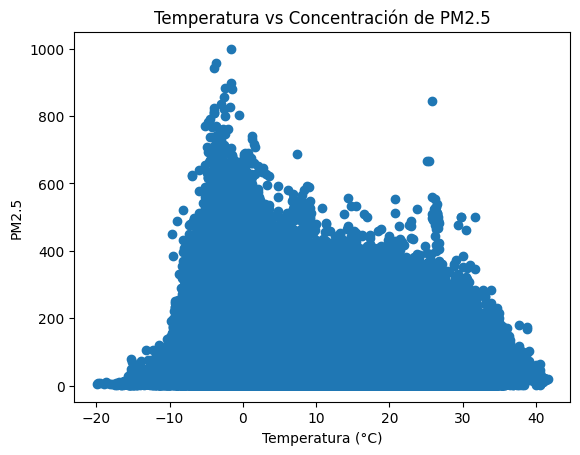

In [10]:
# Graficar la temperatura en función de la concentración de PM2.5
plt.scatter(concatenated_df['TEMP'], concatenated_df['PM2.5'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('PM2.5')
plt.title('Temperatura vs Concentración de PM2.5')
plt.show()

##Concentration of PM2.5 over time

In [11]:
#Transform the variables 'year', 'month', 'day', and 'hour' into a date and time format.
concatenated_df['Date']=pd.to_datetime(concatenated_df[['year','month','day','hour']])
concatenated_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,station,AQI_PM2.5,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI,AQI_Category,Date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,Aotizhongxin,16,3,5,6,0,122,122,Slightly Polluted,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,Aotizhongxin,33,7,5,6,0,122,122,Slightly Polluted,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,Aotizhongxin,29,6,7,9,0,108,108,Slightly Polluted,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,Aotizhongxin,25,5,15,10,0,104,104,Slightly Polluted,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,Aotizhongxin,12,2,17,11,0,104,104,Slightly Polluted,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,...,Wanshouxigong,45,29,4,22,0,104,104,Slightly Polluted,2017-02-28 19:00:00
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,...,Wanshouxigong,52,29,4,38,0,46,52,Good,2017-02-28 20:00:00
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,...,Wanshouxigong,54,25,5,35,0,50,54,Good,2017-02-28 21:00:00
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,...,Wanshouxigong,50,21,5,28,0,64,64,Good,2017-02-28 22:00:00


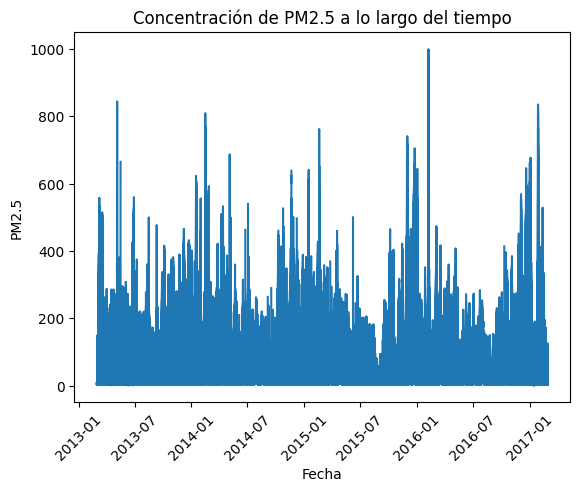

In [12]:
import matplotlib.pyplot as plt

# Graficar la concentración de PM2.5 a lo largo del tiempo
plt.plot(concatenated_df['Date'], concatenated_df['PM2.5'])
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.title('Concentración de PM2.5 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

##Average pollutant values per station

<ipython-input-13-ba428a745234>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_parameters = concatenated_df.groupby('station')['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean()


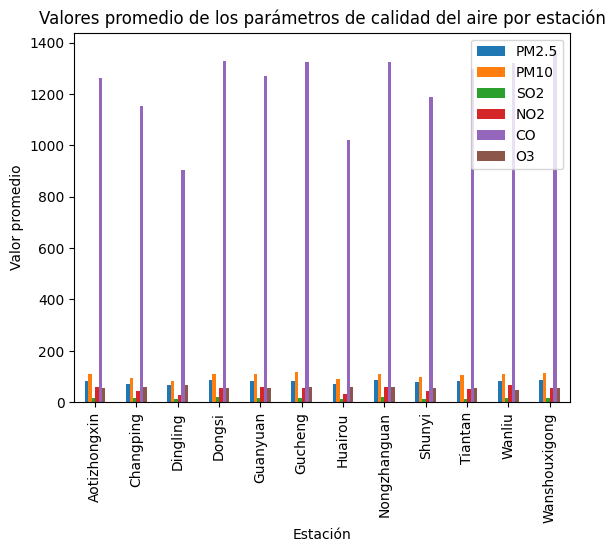

In [13]:
# Calcular el promedio de los parámetros por estación
mean_parameters = concatenated_df.groupby('station')['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean()

# Graficar los valores promedio de los parámetros
mean_parameters.plot(kind='bar')
plt.xlabel('Estación')
plt.ylabel('Valor promedio')
plt.title('Valores promedio de los parámetros de calidad del aire por estación')
plt.legend(loc='upper right')
plt.show()

##Concentration of pollutants by year

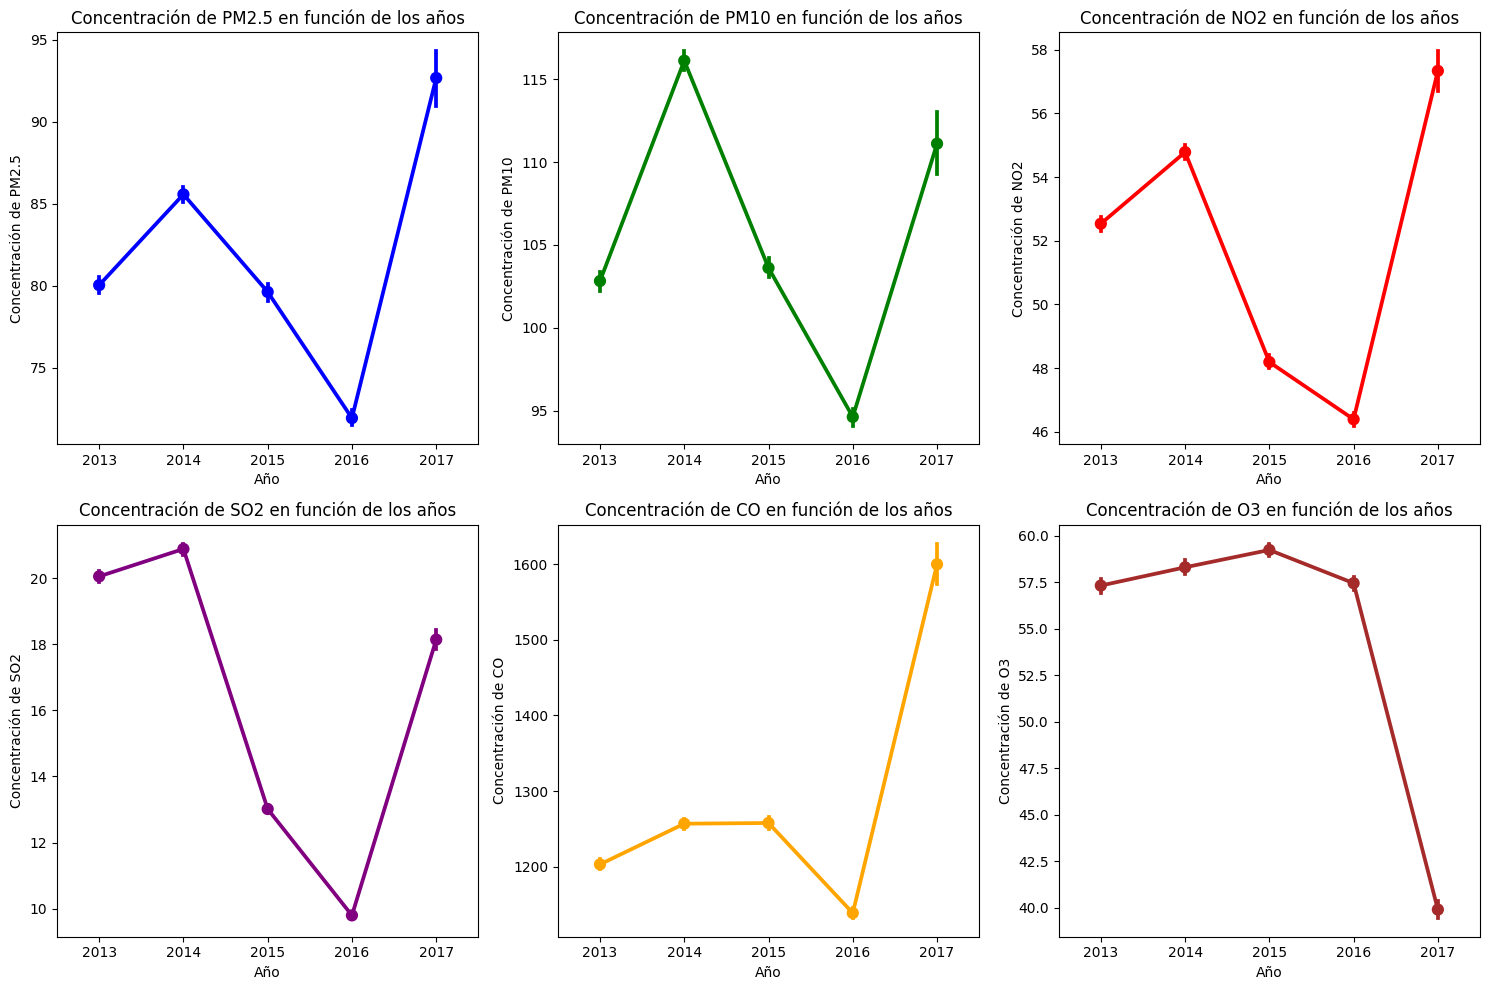

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con una cuadrícula de 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Graficar la concentración de PM2.5 en función de los años
sns.pointplot(x='year', y='PM2.5', data=concatenated_df, color='blue', ax=axs[0, 0])
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Concentración de PM2.5')
axs[0, 0].set_title('Concentración de PM2.5 en función de los años')

# Graficar la concentración de PM10 en función de los años
sns.pointplot(x='year', y='PM10', data=concatenated_df, color='green', ax=axs[0, 1])
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Concentración de PM10')
axs[0, 1].set_title('Concentración de PM10 en función de los años')

# Graficar la concentración de NO2 en función de los años
sns.pointplot(x='year', y='NO2', data=concatenated_df, color='red', ax=axs[0, 2])
axs[0, 2].set_xlabel('Año')
axs[0, 2].set_ylabel('Concentración de NO2')
axs[0, 2].set_title('Concentración de NO2 en función de los años')

# Graficar la concentración de SO2 en función de los años
sns.pointplot(x='year', y='SO2', data=concatenated_df, color='purple', ax=axs[1, 0])
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Concentración de SO2')
axs[1, 0].set_title('Concentración de SO2 en función de los años')

# Graficar la concentración de CO en función de los años
sns.pointplot(x='year', y='CO', data=concatenated_df, color='orange', ax=axs[1, 1])
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Concentración de CO')
axs[1, 1].set_title('Concentración de CO en función de los años')

# Graficar la concentración de O3 en función de los años
sns.pointplot(x='year', y='O3', data=concatenated_df, color='brown', ax=axs[1, 2])
axs[1, 2].set_xlabel('Año')
axs[1, 2].set_ylabel('Concentración de O3')
axs[1, 2].set_title('Concentración de O3 en función de los años')

# Ajustar los espacios entre las gráficas
plt.tight_layout()

# Mostrar la figura
plt.show()


##PM2.5 per station


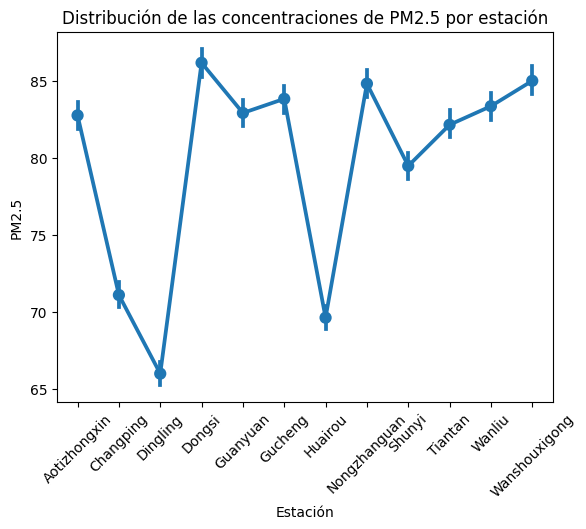

In [15]:
# Graficar las concentraciones de PM2.5 por estación utilizando un pointplot
sns.pointplot(x='station', y='PM2.5', data=concatenated_df)
plt.xlabel('Estación')
plt.ylabel('PM2.5')
plt.title('Distribución de las concentraciones de PM2.5 por estación')
plt.xticks(rotation=45)
plt.show()

##Pollution by station and hour during 2017.

<ipython-input-16-10daefcc8512>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_contaminants = df_2017.groupby(['hour', 'station']).mean().reset_index()


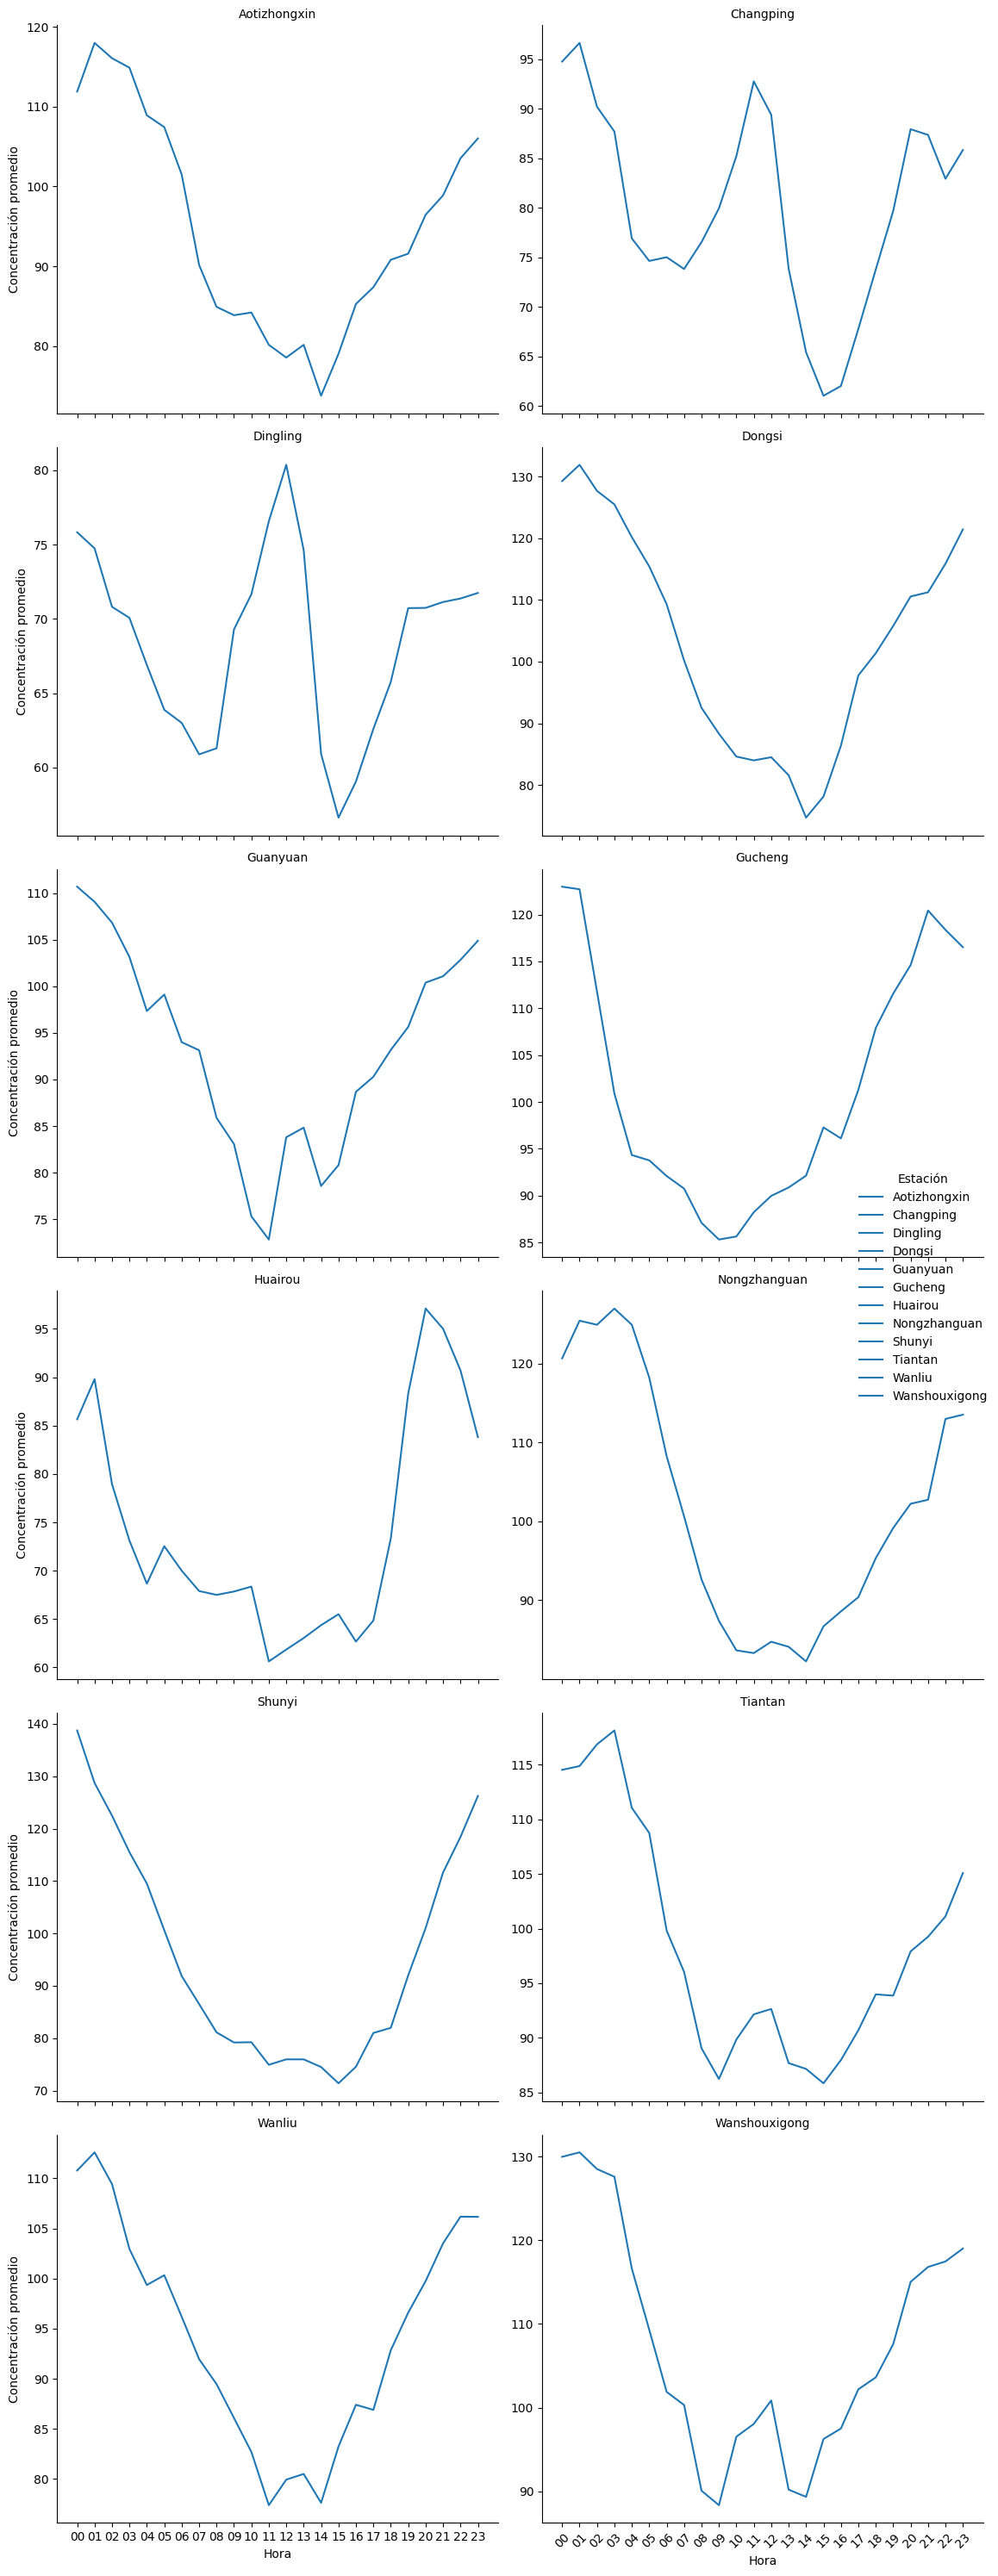

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Filtrar los datos para el año 2017
df_2017 = concatenated_df[concatenated_df['year'] == 2017]

# Agrupar los datos por hora, estación y contaminante, y calcular el promedio
mean_contaminants = df_2017.groupby(['hour', 'station']).mean().reset_index()

# Crear un FacetGrid con una gráfica por cada estación
grid = sns.FacetGrid(mean_contaminants, col='station', col_wrap=2, height=5, sharey=False)

# Graficar los contaminantes por hora en cada estación
grid.map_dataframe(sns.lineplot, x='hour', y='PM2.5', hue='station', data=mean_contaminants)
grid.set_axis_labels('Hora', 'Concentración promedio')
grid.set_titles('{col_name}')
grid.add_legend(title='Estación')

# Obtener las etiquetas de las horas
hour_labels = [datetime.strptime(str(hour), "%H").strftime("%H") for hour in mean_contaminants['hour'].unique()]

# Agregar las etiquetas de las horas en el eje x con rotación de 45 grados
plt.xticks(range(24), hour_labels, rotation=45)

plt.tight_layout()
plt.show()


#Data processing

In [17]:
#Copy of the database to prevent potential future errors
Beijing_Air_Quality=concatenated_df.copy()
Beijing_Air_Quality

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,station,AQI_PM2.5,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI,AQI_Category,Date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,Aotizhongxin,16,3,5,6,0,122,122,Slightly Polluted,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,Aotizhongxin,33,7,5,6,0,122,122,Slightly Polluted,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,Aotizhongxin,29,6,7,9,0,108,108,Slightly Polluted,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,Aotizhongxin,25,5,15,10,0,104,104,Slightly Polluted,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,Aotizhongxin,12,2,17,11,0,104,104,Slightly Polluted,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,...,Wanshouxigong,45,29,4,22,0,104,104,Slightly Polluted,2017-02-28 19:00:00
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,...,Wanshouxigong,52,29,4,38,0,46,52,Good,2017-02-28 20:00:00
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,...,Wanshouxigong,54,25,5,35,0,50,54,Good,2017-02-28 21:00:00
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,...,Wanshouxigong,50,21,5,28,0,64,64,Good,2017-02-28 22:00:00


###Remove unnecessary columns

In [18]:
Beijing_Air_Quality.drop(['AQI_PM2.5', 'AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3'],axis=1, inplace=True)


In [19]:
Beijing_Air_Quality.drop(['hour','Date'],axis=1, inplace=True)


In [20]:
#Beijing_Air_Quality.drop(['TEMP','PRES','DEWP','RAIN','WindDirection','WindSpeed','station'],axis=1, inplace=True)


<ipython-input-21-db055267252e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Beijing_Air_Quality.corr()


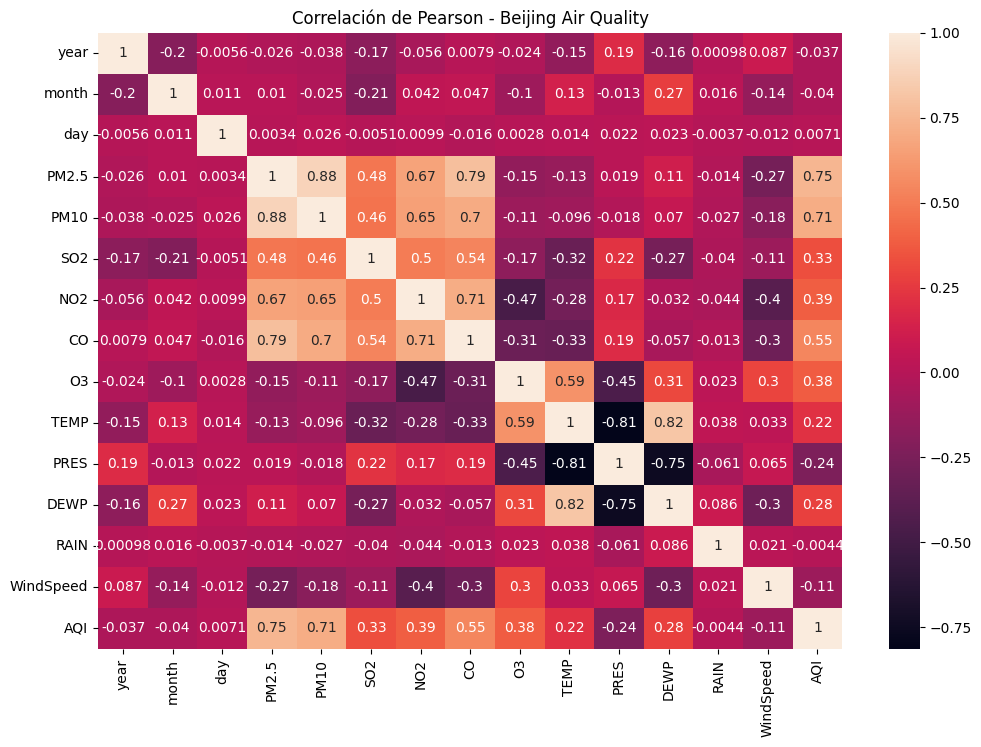

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de Pearson
corr_matrix = Beijing_Air_Quality.corr()

# Crear un gráfico de correlación utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlación de Pearson - Beijing Air Quality')
plt.show()


###Formato de variables

In [22]:
#The info function is used to determine the variable type of the data for imputation purposes or discretize
Beijing_Air_Quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   year           420768 non-null  int64   
 1   month          420768 non-null  int64   
 2   day            420768 non-null  int64   
 3   PM2.5          412029 non-null  float64 
 4   PM10           414319 non-null  float64 
 5   SO2            411747 non-null  float64 
 6   NO2            408652 non-null  float64 
 7   CO             400067 non-null  float64 
 8   O3             407491 non-null  float64 
 9   TEMP           420370 non-null  float64 
 10  PRES           420375 non-null  float64 
 11  DEWP           420365 non-null  float64 
 12  RAIN           420378 non-null  float64 
 13  WindDirection  418946 non-null  object  
 14  WindSpeed      420450 non-null  float64 
 15  station        420768 non-null  object  
 16  AQI            420768 non-null  int64   
 17  AQI_Categor

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
#Tranformar variables categoricas a numericas
Beijing_Air_Quality['WindDirection']=le.fit_transform(Beijing_Air_Quality['WindDirection'])
Beijing_Air_Quality['station']=le.fit_transform(Beijing_Air_Quality['station'])
#Beijing_Air_Quality['AQI_Category']=le.fit_transform(Beijing_Air_Quality['AQI_Category'])

Beijing_Air_Quality

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WindDirection,WindSpeed,station,AQI,AQI_Category
0,2013,3,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0,122,Slightly Polluted
1,2013,3,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0,122,Slightly Polluted
2,2013,3,1,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0,108,Slightly Polluted
3,2013,3,1,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0,104,Slightly Polluted
4,2013,3,1,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0,104,Slightly Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,7,2.4,11,104,Slightly Polluted
35060,2017,2,28,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,14,0.9,11,52,Good
35061,2017,2,28,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,7,1.1,11,54,Good
35062,2017,2,28,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,6,1.2,11,64,Good


##Eliminacion de atípicos


In [25]:
#The info function is used to determine the variable type of the data for imputation purposes
Beijing_Air_Quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   year           420768 non-null  int64   
 1   month          420768 non-null  int64   
 2   day            420768 non-null  int64   
 3   PM2.5          412029 non-null  float64 
 4   PM10           414319 non-null  float64 
 5   SO2            411747 non-null  float64 
 6   NO2            408652 non-null  float64 
 7   CO             400067 non-null  float64 
 8   O3             407491 non-null  float64 
 9   TEMP           420370 non-null  float64 
 10  PRES           420375 non-null  float64 
 11  DEWP           420365 non-null  float64 
 12  RAIN           420378 non-null  float64 
 13  WindDirection  420768 non-null  int64   
 14  WindSpeed      420450 non-null  float64 
 15  station        420768 non-null  int64   
 16  AQI            420768 non-null  int64   
 17  AQI_Categor

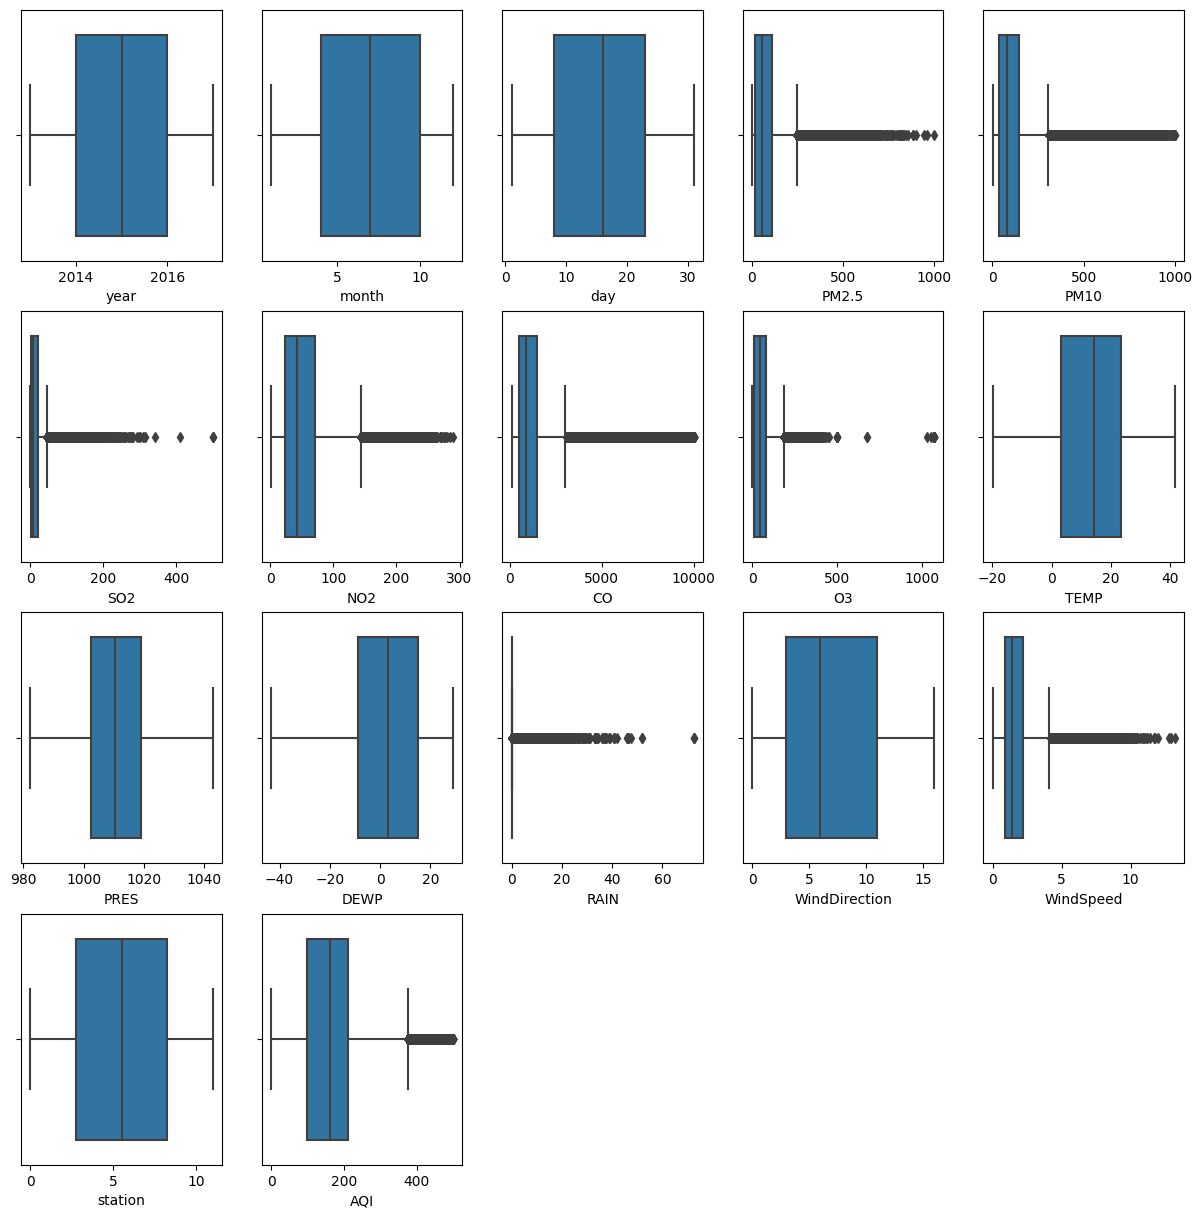

In [26]:
plt.figure(figsize=(15,15))
c =Beijing_Air_Quality.columns[:-1]
for i in enumerate(c):
  plt.subplot(4,5,i[0]+1)
  sns.boxplot(x=i[1],data=Beijing_Air_Quality)


In [27]:
for i in c:
  q1=Beijing_Air_Quality[i].quantile(0.05)#valor de lo que se va a borra
  q4=Beijing_Air_Quality[i].quantile(0.95)#valor
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]<=q1]=q1
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]>=q4]=q4


<ipython-input-27-c0f4740ef4ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]<=q1]=q1
<ipython-input-27-c0f4740ef4ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]>=q4]=q4
<ipython-input-27-c0f4740ef4ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]<=q1]=q1
<ipython-input-27-c0f4740ef4ad>:5:

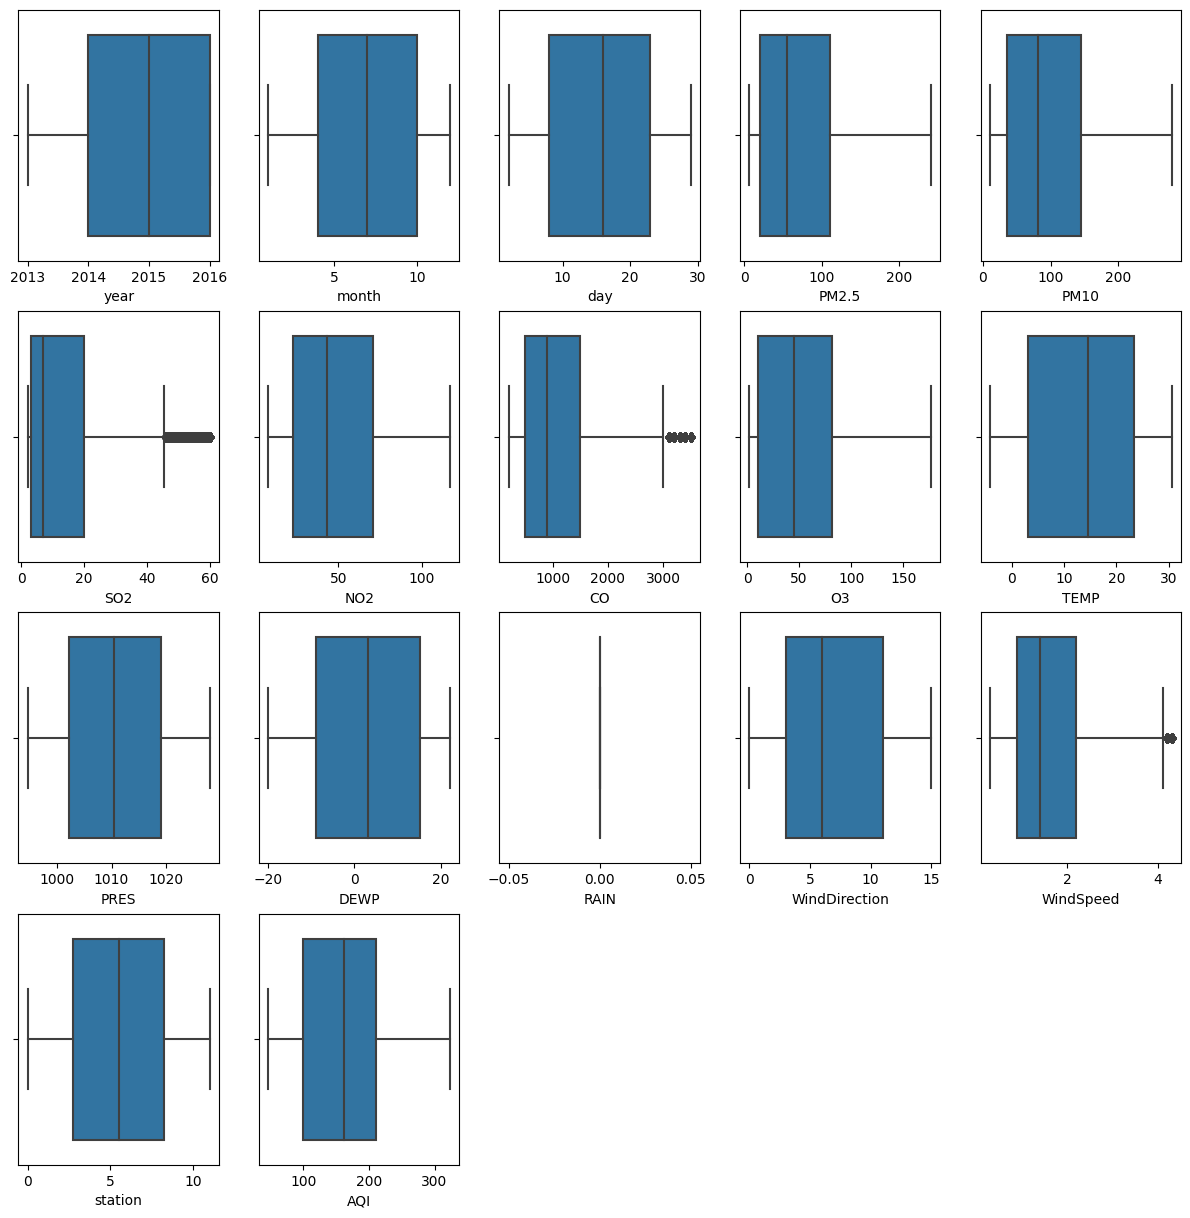

In [28]:
plt.figure(figsize=(15,15))
c =Beijing_Air_Quality.columns[:-1]
for i in enumerate(c):
  plt.subplot(4,5,i[0]+1)
  sns.boxplot(x=i[1],data=Beijing_Air_Quality)

##Valores nulos

In [29]:
Beijing_Air_Quality.isnull().sum()

year                 0
month                0
day                  0
PM2.5             8739
PM10              6449
SO2               9021
NO2              12116
CO               20701
O3               13277
TEMP               398
PRES               393
DEWP               403
RAIN               390
WindDirection        0
WindSpeed          318
station              0
AQI                  0
AQI_Category         0
dtype: int64

In [30]:
Beijing_Air_Quality.describe()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WindDirection,WindSpeed,station,AQI,AQI_Category
count,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.0,420768.000000,420450.000000,420768.000000,420768.000000,420768.000000
mean,2014.622177,6.522930,15.694045,75.883891,100.198285,14.475730,49.582737,1159.196487,55.241635,13.555153,1010.735681,2.570466,0.0,6.829072,1.687273,5.500000,163.622017,3.079913
std,1.111648,3.448707,8.636095,67.478358,76.739265,16.453436,31.671057,895.743369,50.089732,11.062156,9.976724,13.391786,0.0,4.590581,1.065335,3.452057,77.803138,1.766066
min,2013.000000,1.000000,2.000000,6.000000,10.000000,2.000000,8.000000,200.000000,2.000000,-4.200000,994.700000,-19.900000,0.0,0.000000,0.300000,0.000000,46.000000,0.000000
25%,2014.000000,4.000000,8.000000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.0,3.000000,0.900000,2.750000,99.000000,1.000000
50%,2015.000000,7.000000,16.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.0,6.000000,1.400000,5.500000,162.000000,3.000000
75%,2016.000000,10.000000,23.000000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.0,11.000000,2.200000,8.250000,210.000000,4.000000
max,2016.000000,12.000000,29.000000,242.000000,279.000000,60.000000,117.000000,3500.000000,177.000000,30.600000,1027.900000,22.100000,0.0,15.000000,4.300000,11.000000,324.000000,6.000000


In [29]:
Beijing_Air_Quality['RAIN']=le.fit_transform(Beijing_Air_Quality['RAIN'])


In [30]:
# fill the null values in numerical columns
Beijing_Air_Quality['PM2.5'].fillna(Beijing_Air_Quality['PM2.5'].median(), inplace=True)
Beijing_Air_Quality['PM10'].fillna(Beijing_Air_Quality['PM10'].median(), inplace=True)
Beijing_Air_Quality['SO2'].fillna(Beijing_Air_Quality['SO2'].median(), inplace=True)
Beijing_Air_Quality['NO2'].fillna(Beijing_Air_Quality['NO2'].median(), inplace=True)
Beijing_Air_Quality['CO'].fillna(Beijing_Air_Quality['CO'].median(), inplace=True)
Beijing_Air_Quality['O3'].fillna(Beijing_Air_Quality['O3'].median(), inplace=True)
Beijing_Air_Quality['TEMP'].fillna(Beijing_Air_Quality['TEMP'].median(), inplace=True)
Beijing_Air_Quality['PRES'].fillna(Beijing_Air_Quality['PRES'].median(), inplace=True)
Beijing_Air_Quality['DEWP'].fillna(Beijing_Air_Quality['DEWP'].median(), inplace=True)
Beijing_Air_Quality['WindSpeed'].fillna(Beijing_Air_Quality['WindSpeed'].median(), inplace=True)

In [31]:
Beijing_Air_Quality.isnull().sum()

year             0
month            0
day              0
PM2.5            0
PM10             0
SO2              0
NO2              0
CO               0
O3               0
TEMP             0
PRES             0
DEWP             0
RAIN             0
WindDirection    0
WindSpeed        0
station          0
AQI              0
AQI_Category     0
dtype: int64

In [32]:
# Dividir los datos en características (X) y variable objetivo (y)
X = Beijing_Air_Quality.drop(['AQI','AQI_Category'], axis=1)  # Características (todas las columnas excepto AQI)
y = Beijing_Air_Quality['AQI']  # Variable objetivo (AQI)

#Model Training and Evaluation

##Regression to predict AQI


##Splitting the data

In [33]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Training and testing


####Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
# Crear el modelo de regresión lineal
rl_model = LinearRegression()
# Entrenar el modelo
rl_model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_rl = rl_model.predict(X_test)

####Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)


###Selecting and Computing evaluation metrics

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = mean_squared_error(y_test, y_pred_rl, squared=False)
mae_rl = mean_absolute_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

print("Mean Squared Error (MSE) for Regression Lineal:", mse_rl)
print("Root Mean Squared Error (RMSE) for Regression Lineal:", rmse_rl)
print("Mean Absolute Error (MAE) for Regression Lineal:", mae_rl)
print("Coefficient of Determination (R2) for Regression Lineal:", r2_rl)

Mean Squared Error (MSE) for Regression Lineal: 1067.7403235511983
Root Mean Squared Error (RMSE) for Regression Lineal: 32.676296050060486
Mean Absolute Error (MAE) for Regression Lineal: 25.697922907756634
Coefficient of Determination (R2) for Regression Lineal: 0.8233732474880047


In [37]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (MSE) for DecisionTree:", mse_dt)
print("Root Mean Squared Error (RMSE) for DecisionTree:", rmse_dt)
print("Mean Absolute Error (MAE) for DecisionTree:", mae_dt)
print("Coefficient of Determination (R2) for DecisionTree:", r2_dt)

Mean Squared Error (MSE) for DecisionTree: 118.13830992386973
Root Mean Squared Error (RMSE) for DecisionTree: 10.869144857065331
Mean Absolute Error (MAE) for DecisionTree: 1.606744777431851
Coefficient of Determination (R2) for DecisionTree: 0.9804574337328488


#####Performance Comparison of Models

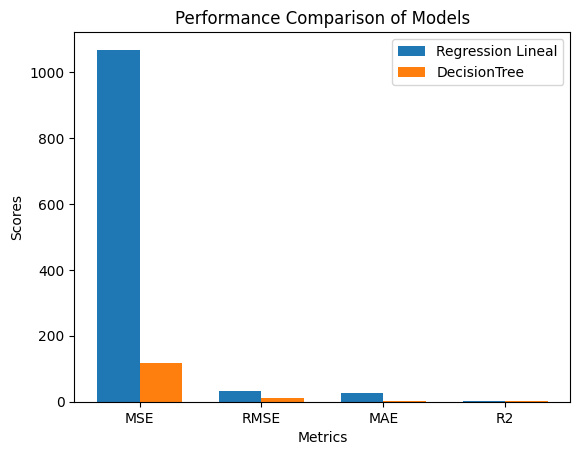

In [67]:
import matplotlib.pyplot as plt
import numpy as np
# Crear las listas de métricas y modelos
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
regression_lineal_scores = [mse_rl, rmse_rl, mae_rl, r2_rl]
decision_tree_scores = [mse_dt, rmse_dt, mae_dt, r2_dt]

# Configurar los valores de posición de las barras
bar_width = 0.35
index = np.arange(len(metrics))

# Crear el gráfico de barras
fig, ax = plt.subplots()
bar1 = ax.bar(index, regression_lineal_scores, bar_width, label='Regression Lineal')
bar2 = ax.bar(index + bar_width, decision_tree_scores, bar_width, label='DecisionTree')

# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE) for Random Forest:", mse_rf)
print("Root Mean Squared Error (RMSE) for Random Forest:", rmse_rf)
print("Mean Absolute Error (MAE) for Random Forest:", mae_rf)
print("Coefficient of Determination (R2) for Random Forest:", r2_rf)

###Cross-validation

In [38]:
from sklearn.model_selection import cross_val_score

#Cross-validation using 5 folds for Regression Lineal
scores = cross_val_score(rl_model, X, y, cv=10)
print("Cross-Validation RL Scores:", scores)
print("Average Accuracy RL:", scores.mean())


Cross-Validation RL Scores: [0.81847048 0.81867291 0.81097066 0.8300036  0.81782602 0.81422594
 0.82186512 0.82508479 0.8391511  0.83126112]
Average Accuracy RL: 0.8227531737813173


In [39]:
#Cross-validation using 5 folds for Decision Tree
scores = cross_val_score(dt_model, X, y, cv=3)
print("Cross-Validation RF Scores:", scores)
print("Average Accuracy RF:", scores.mean())

Cross-Validation RF Scores: [0.97448532 0.97431873 0.97580937]
Average Accuracy RF: 0.9748711417695551


In [ ]:
#Cross-validation using 5 folds for Random Forest
scores = cross_val_score(random_forest_model, X, y, cv=2)
print("Cross-Validation RF Scores:", scores)
print("Average Accuracy RF:", scores.mean())

###Hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning using grid search for RL
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(rl_model, param_grid, cv=6)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters', best_params)

# Crear el modelo de regresión lineal despues de Cross-validation
rl_model = LinearRegression(fit_intercept=True)
# Entrenar el modelo
rl_model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_rl = rl_model.predict(X_test)

mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = mean_squared_error(y_test, y_pred_rl, squared=False)
mae_rl = mean_absolute_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

print("Mean Squared Error (MSE) for Regression Lineal:", mse_rl)
print("Root Mean Squared Error (RMSE) for Regression Lineal:", rmse_rl)
print("Mean Absolute Error (MAE) for Regression Lineal:", mae_rl)
print("Coefficient of Determination (R2) for Regression Lineal:", r2_rl)


Best parameters {'fit_intercept': True}
Mean Squared Error (MSE) for Regression Lineal: 1067.7403235511983
Root Mean Squared Error (RMSE) for Regression Lineal: 32.676296050060486
Mean Absolute Error (MAE) for Regression Lineal: 25.697922907756634
Coefficient of Determination (R2) for Regression Lineal: 0.8233732474880047


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters:', best_params)

# Create the DecisionTreeRegressor with the best parameters
dt_model = DecisionTreeRegressor(**best_params)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (MSE) for DecisionTree:", mse_dt)
print("Root Mean Squared Error (RMSE) for DecisionTree:", rmse_dt)
print("Mean Absolute Error (MAE) for DecisionTree:", mae_dt)
print("Coefficient of Determination (R2) for DecisionTree:", r2_dt)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (MSE) for DecisionTree: 90.54814093673284
Root Mean Squared Error (RMSE) for DecisionTree: 9.51567869028441
Mean Absolute Error (MAE) for DecisionTree: 2.745410232864205
Coefficient of Determination (R2) for DecisionTree: 0.9850214291556755


#####Performance Comparison of Models After CV and HT

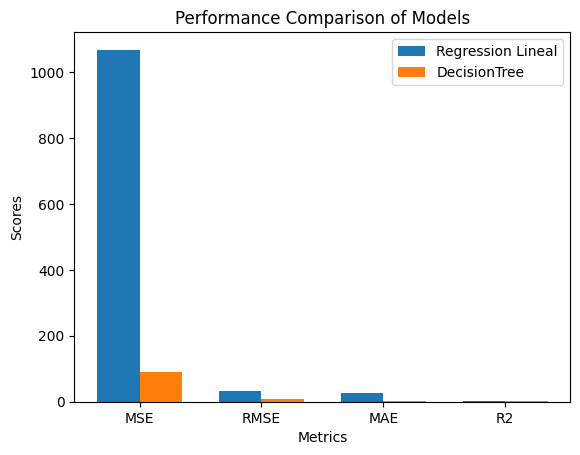

In [71]:
import matplotlib.pyplot as plt
import numpy as np
# Crear las listas de métricas y modelos
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
regression_lineal_scores = [mse_rl, rmse_rl, mae_rl, r2_rl]
decision_tree_scores = [mse_dt, rmse_dt, mae_dt, r2_dt]

# Configurar los valores de posición de las barras
bar_width = 0.35
index = np.arange(len(metrics))

# Crear el gráfico de barras
fig, ax = plt.subplots()
bar1 = ax.bar(index, regression_lineal_scores, bar_width, label='Regression Lineal')
bar2 = ax.bar(index + bar_width, decision_tree_scores, bar_width, label='DecisionTree')

# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Define the parameter grid for hyperparameter tuning FOR RF
""
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest_model, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print('Best parameters', best_params)
""

##Clasification for predict AQI_Category

In [50]:
# Dividir los datos en características (X) y variable objetivo (y)
X1 = Beijing_Air_Quality.drop(['AQI','AQI_Category'], axis=1)  # Características (todas las columnas excepto AQI)
y1 = Beijing_Air_Quality['AQI_Category']  # Variable objetivo (AQI)

###Splitting the data

In [51]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

###Training and testing

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Crear el modelo de Random Forest
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rfc_model.fit(X_train1, y_train1)

# Realizar predicciones en el conjunto de prueba
y_pred_rfc = rfc_model.predict(X_test1)

from sklearn.metrics import classification_report, accuracy_score


In [60]:
from sklearn.tree import DecisionTreeClassifier
# Crear el modelo de Random Forest
dtc_model = DecisionTreeClassifier()

# Entrenar el modelo
dtc_model.fit(X_train1, y_train1)

# Realizar predicciones en el conjunto de prueba
y_pred_dtc = dtc_model.predict(X_test1)



###Selecting and Computing evaluation metrics

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Obtener el informe de clasificación
print(classification_report(y_test, y_pred_rfc))

In [62]:
# Obtener el informe de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test1, y_pred_dtc)
precision = precision_score(y_test1, y_pred_dtc, average='micro')
recall = recall_score(y_test1, y_pred_dtc, average='micro')
f1 = f1_score(y_test1, y_pred_dtc, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9730810973532651
Precision: 0.9730810973532651
Recall: 0.9730810973532651
F1 Score: 0.9730810973532651


###Cross-validation

In [63]:
# Example of cross-validation using 5 folds for  DecisionTreeClassifier
scores = cross_val_score(dtc_model, X1, y1, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.96645436 0.97129073 0.96725052 0.97155182 0.97148052]
Average Accuracy: 0.9696055874523706


###Hyperparameter tuning